<a href="https://colab.research.google.com/github/nmeena2/astro_assignments/blob/main/414_HW_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


Text(0.5, 1.0, 'Flat')

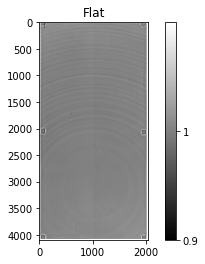

In [ ]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np


dec = fits.open('/content/gdrive/MyDrive/DECam_00380036_09.fits')
bias = fits.open('/content/gdrive/MyDrive/D_n20131112t1127_c13_r1472p01_biascor.fits')
flat = fits.open('/content/gdrive/MyDrive/D_n20131112t1127_r_c13_r1472p01_dflatcor.fits')

biasimg = bias[0].data
flatimg = flat[0].data

plt.imshow(flatimg, cmap = 'gray', vmin = 0.9, vmax = 1.1)
cbar = plt.colorbar(ticks = [9E-1, 1, 2])
cbar.ax.set_yticklabels(['0.9', '1', '2'])
plt.title('Flat')

Text(0.5, 1.0, 'Bias')

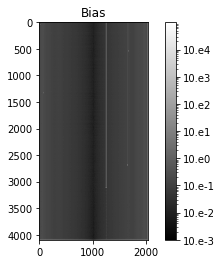

In [ ]:
from matplotlib.colors import LogNorm

plt.imshow(biasimg, cmap = 'gray', norm = LogNorm(vmin = 10.e-3, vmax = 10.e5))
cbar_bias = plt.colorbar(ticks = [10.e-3, 10.e-2, 10.e-1, 10.e0, 10.e1, 10.e2, 10.e3, 10.e4])
cbar_bias.ax.set_yticklabels(['10.e-3', '10.e-2', '10.e-1', '10.e0', '10.e1', '10.e2', '10.e3', '10.e4'])
plt.title('Bias')

Text(0.5, 1.0, 'DECam Data')

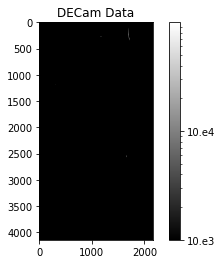

In [ ]:
decimg = dec[0].data

plt.imshow(decimg, cmap = 'gray', norm = LogNorm(vmin = 10.e3, vmax = 10.e5))
cbar_dec = plt.colorbar(ticks = [10.e3, 10.e4])
cbar_dec.ax.set_yticklabels(['10.e3', '10.e4'])
plt.title('DECam Data')

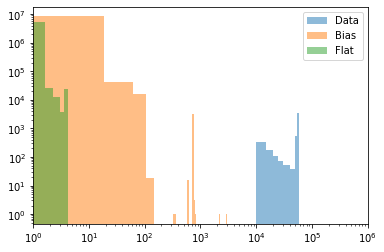

In [ ]:
ax1 = decimg.flatten()
ax2 = biasimg.flatten()
ax3 = flatimg.flatten()


plt.hist(ax1, bins = 200, range = (10.e3, 10.e5), alpha=0.5, log = True,  label='Data')
plt.hist(ax2, bins = 1000, alpha=0.5, log = True, label='Bias')
plt.hist(ax3, bins = 150, range = (10.e-1, 10.e1), alpha = 0.5, log = True, label = 'Flat')

plt.xscale('log')
plt.xlim(10.e-1, 10.e5)
plt.legend(loc='upper right')
plt.show()